In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random
from scipy import signal
from scipy.io import wavfile
from scipy.stats import pearsonr

## 1. feladat
Egy digitális áramkör ütemezését $f_\mathrm{clock}$ frekvencia jellemzi. Az áramkör analóg jelet mintavételez a 0 $\dots$ $U_\mathrm{FS}$ feszültségtartományon és 10 bites szavakban kódol. Attól függően, hogy milyen analóg-digitális átalakítót alkalmazunk eltérő ideig tart a konverzió. Becsülje meg ezt az időt:

1. szukcesszív-approximációs átalakító,
2. flash-konverter,
3. egy rámpás (számlálóalapú)
4. két rámpás (dual-slope) megoldás esetén.

### szukcesszív-approximációs átalakító

konverziós idő  = $n \cdot T_{clock}$ - ahol n jelölje a bitek számát, ami jelen esetünkben 10.

$T_{clock} = \frac{1}{f_{clock}}$ tehát a képletünk módósul, $t_{conv} = \frac{n}{f_{clock}}$-ra.

Legy $f_{clock} =$ 1 MHz, mely mondjuk mikrokontrollerek esetén egy jellemző érték.

A konverziós idő így: $\frac{10}{10^6} = 10 \mu s$

### flash-konverter

Egy n bites átváltáshoz a flashkonverter $2^n -1$ komparátorral kell, hogy rendelkezzen. A konverizós idő így 1 óra ciklus lesz. ami 1 $\mu$s-nek felel meg. 

($\textbf{megjegyzés:}$
Az interneten való kutatgatásom során azt találtam, hogy pontossági okokra hivatkozva egy átlagos flash konvertert 8 bit-ben maximalizálunk, ennek következménye, hogy 2 óra ciklus szükséges a jel átalakításához. A különböző konverterek sebességbeli összehasonlításának érdekében most is $f_{clock} = 1$MHz értékkel számoltam.

$T_{clock} = \frac{1}{f_{clock}} = \frac{1}{10^6} = 1 \mu$s . Az átválátsí idő így: $t_{conv} = 2 \mu$s.)

### egy rámpás

Egyrámpás konverter estén a konverziós időt felírhatjuk mint: $t_{conv} = 2^nT_{clock}$

Ha most $f_{clock} = 1$MHz $\to T_{clock} =  \frac{1}{10^6} = 1 \mu$s értéket vesszük, és n = 10 a bitek számát jelenti, akkor az előző képletbe   visszahelyettesítve, az eredményünk: $t_{conv} = 1024 \cdot 1 \mu$s = $1024 \mu$s

### két rámpás

Két rámpás konverter esetén a konverziós idő: $2^{n+1}.$

Tehát végső soron: $t_{conv} = 2048 \mu$s 

### diszkusszió:

Mint a neve is utalt rá a flash konverter bizonyult a leggyorsabbnak, míg az két rámpás konverter a leglassabbnak

## 2. feladat
Legyen $q$ kvantálással jellemzett átalakítónk. A mérendő konstans jel zajjal terhelt. Mit mondhatunk a kódszavak eloszlásáról, ha a jelre $\sigma$ szórással jellemzett normális eloszlást követő zaj ül? Járja numerikusan is körbe a problémát. A mérési sokaságból hogyan képezné a mérendő jel becslését?

Text(0, 0.5, 'amplitudó')

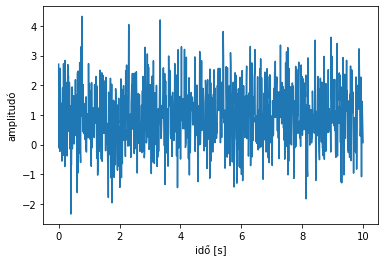

In [3]:
#A jel:

hossz = 1000 
sigma = 1

konstas_jel = np.ones(hossz) #csinálok mondjuk egy egy értékű konsans jelet
zaj = np.random.normal(0,sigma,hossz) #kreálok egy normális eloszlású zajt

final_jel = konstas_jel + zaj #a zajos jel

t = linspace(0,10,1000)
plot(t,final_jel)
xlabel("idő [s]")
ylabel("amplitudó")

Az A/D átalakító az analóg jel értékeinek egy-egy kis résztartományához rendel egy digitális értéket. Ezeken belül bármely jelhez ugyanazt az értéket, a tartomány középértékét, a névleges kvantálási szintet fogja rendelni a konverter.

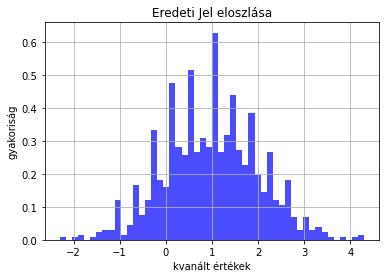

In [4]:
q = 0.1 #q kvantálás a finomítás paramétere, azt mondja meg, hogy a kvantált értékek milyen lépséközben változhatank
kvantált_jel = np.round(final_jel / q) * q #lekerekítem a legközelebbi egyész számra és vissza szorzom q-val, hogy megkapjam a kvantált érétkét

hist(kvantált_jel, bins=50, density=True, color='b', alpha=0.7)
title('Eredeti Jel eloszlása')
ylabel("gyakoriság")
xlabel("kvanált értékek")
grid(True)

Első lépésben, hogy kicsit elemezzem a kódszavak eloszlását, q paraméternek igen kis értéket állítottam be, hogy sok különböző apmliutdó érték jelenjen meg a hisztogrammon. Azt látom amire számítottam, egy normális eloszlást, természetesen a legnagyobb csúcs az eredeti zajmentes jel, a konstans 1 környékén fog kirajzolódni.

### numerikus vizsgálat:

A kódszavak eloszlásának numerikus vizsgálatára úgy kerítettem sort, hogy választottam négy nagyságrendileg eltérő q  értéket és megvizsgáltam az így kapott hisztogrammokat.

Text(0.5, 1.0, '4 bit')

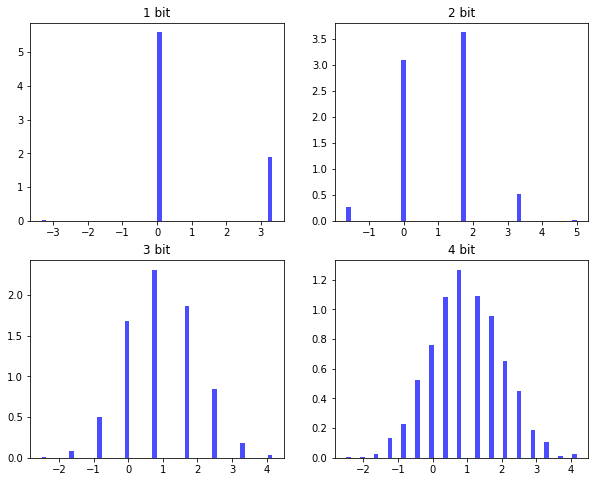

In [5]:
bitek = [1,2,3,4]

histogramms = []
for q in bitek:
    Q = (max(final_jel) - min(final_jel)) / (2 ** q)
    histogramms.append(np.round(final_jel / Q) * Q) 
    
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].hist(histogramms[0], bins=50, density=True, color='b', alpha=0.7)
axs[0,0].set_title("1 bit")
axs[0,1].hist(histogramms[1], bins=50, density=True, color='b', alpha=0.7)
axs[0,1].set_title("2 bit")
axs[1,0].hist(histogramms[2], bins=50, density=True, color='b', alpha=0.7)
axs[1,0].set_title("3 bit")
axs[1,1].hist(histogramms[3], bins=50, density=True, color='b', alpha=0.7)
axs[1,1].set_title("4 bit")

Értelmezésem szerint, a q növelésével, növeljük azon tartományok szélességét, melyekhez ugyan azt a középérétek rendeljük. Gyakorlaban ezzel a szűrő felbontását csökkentjük, azaz egyre kisebb bites szűrőket alkalmazunk. Összeségében azt modhatom, hogy az ilyen durva szűrők alkalmasak bizonyos zajok kiszűrésére. 

## 3. feladat
Vegyen példaként egy tetszőleges jelalakot. Ezt egyenletes $\Delta t$ időközönként mintavételezze és $q$ egységekben kvantálja. Numerikusan vizsgálja meg, hogyan változik a jel teljesítményspektruma $q$-t hangolva. Vizsgála meg azt is, mi történik, ha $\Delta t$ ingadozást mutat.

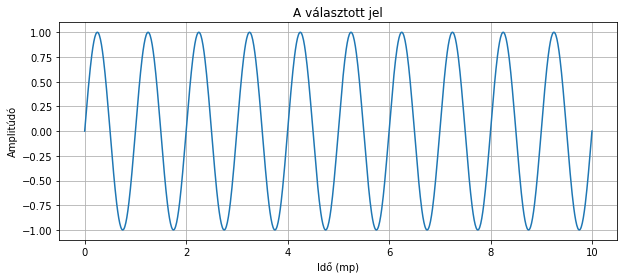

In [6]:
amplitúdó = 1  
frekvencia = 1  
ido = linspace(0,10,1000) #válaszott jel
szinuszhullám = amplitúdó * np.sin(2 * pi * frekvencia*ido)


figure(figsize=(10, 4))
plot(ido, szinuszhullám)
title('A választott jel')
xlabel('Idő (mp)')
ylabel('Amplitúdó')
plt.grid(True)
plt.show()


In [7]:
def mintavételstabil(func,dt):
    s = int(len(t)/max(t)) #1 s hány lépés
    lepes = 1/s  #mennyi egy lépés
    index = int(dt/lepes) #megnézem dt hány lépés
    newjel = szinuszhullám[::index]#ennek megfelelően kiválsztom az értékeket
    newt = ido[::index]
    return newt,newjel

Text(0, 0.5, 'amplitudó')

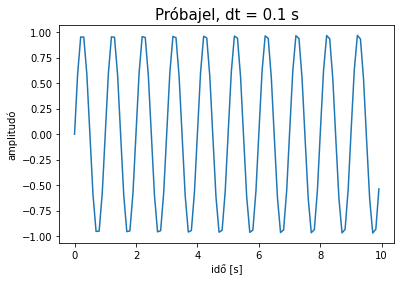

In [8]:
probat,probajel = mintavételstabil(szinuszhullám,0.1)
plot(probat,probajel)
title("Próbajel, dt = 0.1 s", size = 15)
xlabel("idő [s]", size = 10)
ylabel("amplitudó", size = 10)

In [9]:
def kvantálás(jel,bit):
    Q = (max(jel) - min(jel)) / (2 ** bit) #ezt már korábban használtam
    kvantalt = np.round(jel / Q) * Q
    return kvantalt

Az energia értéke 1 Hz esetén: 303423.2465476651


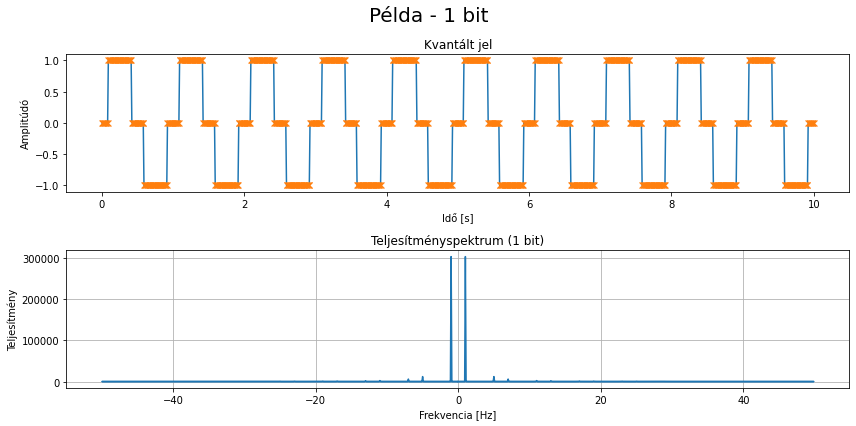

In [10]:
def teljesitmenyspektrum(jel, dt, bit_szam):
    # mintavétel
    mintavételezett_ido, mintavételezett_jel = mintavételstabil(jel, dt)

    # kvantálás
    kvantalt_jel = kvantálás(mintavételezett_jel, bit_szam)

    # teljesítményspektrum
    fft = np.fft.fft(kvantalt_jel)
    teljesitmenyspektrum = np.abs(fft) ** 2
    
    # ábrázoláshoz frekvencia tengely
    N = len(mintavételezett_ido)
    sample_rate = 1 / dt
    frekvencia_tengely = np.fft.fftfreq(N, 1 / sample_rate)

    return mintavételezett_ido, kvantalt_jel, frekvencia_tengely, teljesitmenyspektrum


dt = 0.01
bit_szam = 1
jel = szinuszhullám  


mintavételezett_ido, kvantalt_jel, frekvencia_tengely, spektrum_ertek = teljesitmenyspektrum(jel, dt, bit_szam)

#keresett frekvencia indexének megtalálása
keresett_frekvencia_index = np.argmin(np.abs(frekvencia_tengely - 1))
#hozzátartozó eneriga érték
keresett_spektrum_ertek = spektrum_ertek[keresett_frekvencia_index]

print('Az energia értéke 1 Hz esetén:', keresett_spektrum_ertek)
figure(figsize=(12, 6))
suptitle("Példa - 1 bit", size = 20)
subplot(2, 1, 1)
plot(mintavételezett_ido, kvantalt_jel)
plot(mintavételezett_ido, kvantalt_jel, ls = " ", marker = "x")
title('Kvantált jel')
xlabel('Idő [s]')
ylabel('Amplitúdó')


subplot(2, 1, 2)
plot(frekvencia_tengely, spektrum_ertek)
title(f'Teljesítményspektrum ({bit_szam} bit)')
xlabel('Frekvencia [Hz]')
ylabel('Teljesítmény')
grid()

tight_layout()



Az energia értéke 1 Hz esetén: 303423.2465476651


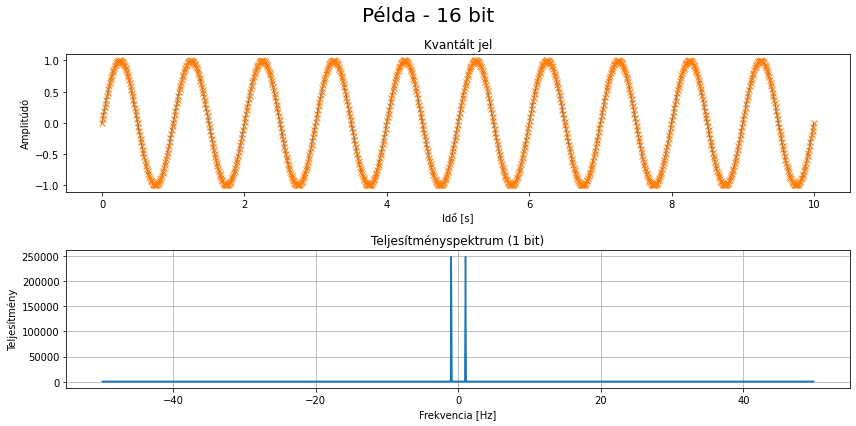

In [11]:
#csináltam egy több bites példát is
mintavételezett_ido, kvantalt_jel, frekvencia_tengely, spektrum_ertek = teljesitmenyspektrum(jel, dt, 16)
print('Az energia értéke 1 Hz esetén:', keresett_spektrum_ertek)
figure(figsize=(12, 6))
suptitle("Példa - 16 bit", size = 20)
subplot(2, 1, 1)
plot(mintavételezett_ido, kvantalt_jel)
plot(mintavételezett_ido, kvantalt_jel, ls = " ", marker = "x")
title('Kvantált jel')
xlabel('Idő [s]')
ylabel('Amplitúdó')


subplot(2, 1, 2)
plot(frekvencia_tengely, spektrum_ertek)
title(f'Teljesítményspektrum ({bit_szam} bit)')
xlabel('Frekvencia [Hz]')
ylabel('Teljesítmény')
grid()

tight_layout()


In [12]:
bits = list(range(1,17)) #végig futtattam 1-16 között teljesítméní és bit közti összefüggést keresve
ertek = []
for bit in bits:
    mintavételezett_ido, kvantalt_jel, frekvencia_tengely, spektrum_ertek = teljesitmenyspektrum(jel, dt, bit)
    #keresett frekvencia indexének megtalálása
    keresett_frekvencia_index = np.argmin(np.abs(frekvencia_tengely - 1))
    #hozzátartozó eneriga érték
    keresett_spektrum_ertek = spektrum_ertek[keresett_frekvencia_index]
    ertek.append(keresett_spektrum_ertek)

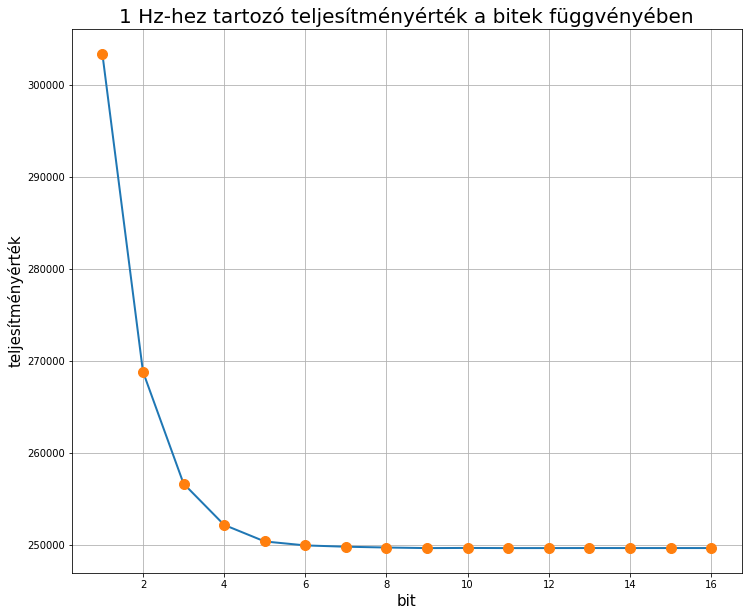

In [13]:
figsize(12,10)
plot(bits,ertek,lw = 2)
plot(bits,ertek, ls = " ", marker = "o", markersize = 10)
title("1 Hz-hez tartozó teljesítményérték a bitek függvényében", size = 20)
xlabel("bit", size = 15)
ylabel("teljesítményérték", size = 15)
grid(True)

Egyenletes mintavételezés esetén az 1 Hz-hez tartozó teljesítményspektrum érték a bitek növelésével, azaz q paraméter csökkentsésével jelentős csökkenésbe kezd, majd látszólag beáll egy értékre. 

## Ingadozó mintavétel

In [14]:
def mintavételingadoz(func):
    index_range = list(range(1000)) #generálam random indexeket 
    random_indexek = random.sample(index_range, 100)
    random_indexek = sort(random_indexek)
    random_ido = ido[random_indexek] #és azok alapján végeztem a mintavételezést
    random_ertekek = szinuszhullám[random_indexek]
    return random_ido,random_ertekek

Az energia értéke 1 Hz esetén: 123.24377059137736


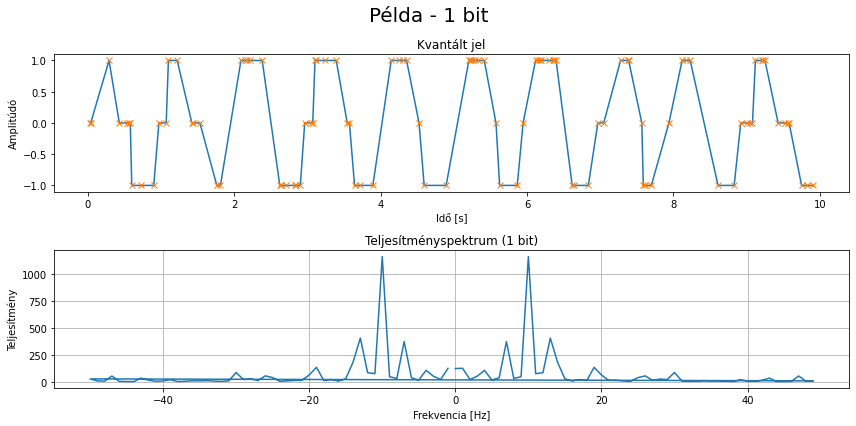

In [15]:
def teljesitmenyspektrum2(jel, bit_szam):
    # mintavétel
    mintavételezett_ido, mintavételezett_jel = mintavételingadoz(szinuszhullám)

    # kvantálás
    kvantalt_jel = kvantálás(mintavételezett_jel, bit_szam)

    # teljesítményspektrum
    fft = np.fft.fft(kvantalt_jel)
    teljesitmenyspektrum = np.abs(fft) ** 2
    
    # ábrázoláshoz frekvencia tengely
    N = len(mintavételezett_ido)
    sample_rate = 1 / dt
    frekvencia_tengely = np.fft.fftfreq(N, 1 / sample_rate)

    return mintavételezett_ido, kvantalt_jel, frekvencia_tengely, teljesitmenyspektrum


dt = 0.01
bit_szam = 1
jel = szinuszhullám  


mintavételezett_ido, kvantalt_jel, frekvencia_tengely, spektrum_ertek = teljesitmenyspektrum2(jel, bit_szam)

#keresett frekvencia indexének megtalálása
keresett_frekvencia_index = np.argmin(np.abs(frekvencia_tengely - 1))
#hozzátartozó eneriga érték
keresett_spektrum_ertek = spektrum_ertek[keresett_frekvencia_index]

print('Az energia értéke 1 Hz esetén:', keresett_spektrum_ertek)
figure(figsize=(12, 6))
suptitle("Példa - 1 bit", size = 20)
subplot(2, 1, 1)
plot(mintavételezett_ido, kvantalt_jel)
plot(mintavételezett_ido, kvantalt_jel, ls = " ", marker = "x")
title('Kvantált jel')
xlabel('Idő [s]')
ylabel('Amplitúdó')


subplot(2, 1, 2)
plot(frekvencia_tengely, spektrum_ertek)
title(f'Teljesítményspektrum ({bit_szam} bit)')
xlabel('Frekvencia [Hz]')
ylabel('Teljesítmény')
grid()

tight_layout()



Az energia értéke 1 Hz esetén: 12.842879579331948


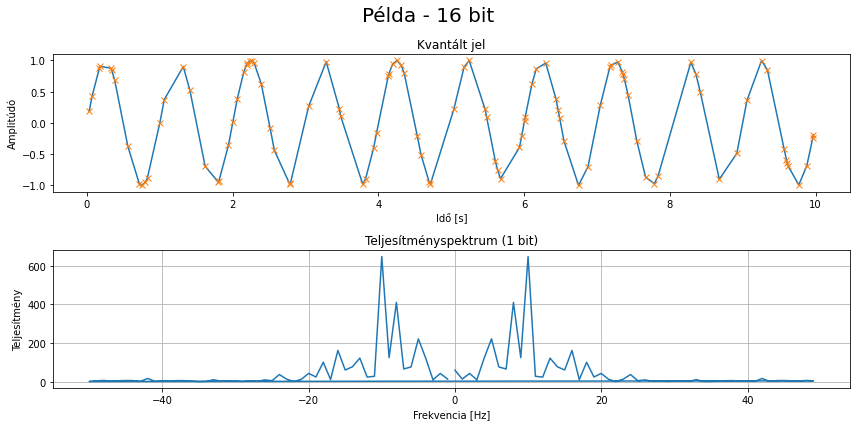

In [16]:
mintavételezett_ido, kvantalt_jel, frekvencia_tengely, spektrum_ertek = teljesitmenyspektrum2(jel, 16)

#keresett frekvencia indexének megtalálása
keresett_frekvencia_index = np.argmin(np.abs(frekvencia_tengely - 1))
#hozzátartozó eneriga érték
keresett_spektrum_ertek = spektrum_ertek[keresett_frekvencia_index]

print('Az energia értéke 1 Hz esetén:', keresett_spektrum_ertek)
figure(figsize=(12, 6))
suptitle("Példa - 16 bit", size = 20)
subplot(2, 1, 1)
plot(mintavételezett_ido, kvantalt_jel)
plot(mintavételezett_ido, kvantalt_jel, ls = " ", marker = "x")
title('Kvantált jel')
xlabel('Idő [s]')
ylabel('Amplitúdó')


subplot(2, 1, 2)
plot(frekvencia_tengely, spektrum_ertek)
title(f'Teljesítményspektrum ({bit_szam} bit)')
xlabel('Frekvencia [Hz]')
ylabel('Teljesítmény')
grid()

tight_layout()



In [17]:
bits = list(range(1,17))
ertek = []
for bit in bits:
    mintavételezett_ido, kvantalt_jel, frekvencia_tengely, spektrum_ertek = teljesitmenyspektrum2(jel, bit)
    #keresett frekvencia indexének megtalálása
    keresett_frekvencia_index = np.argmin(np.abs(frekvencia_tengely - 1))
    #hozzátartozó eneriga érték
    keresett_spektrum_ertek = spektrum_ertek[keresett_frekvencia_index]
    ertek.append(keresett_spektrum_ertek)

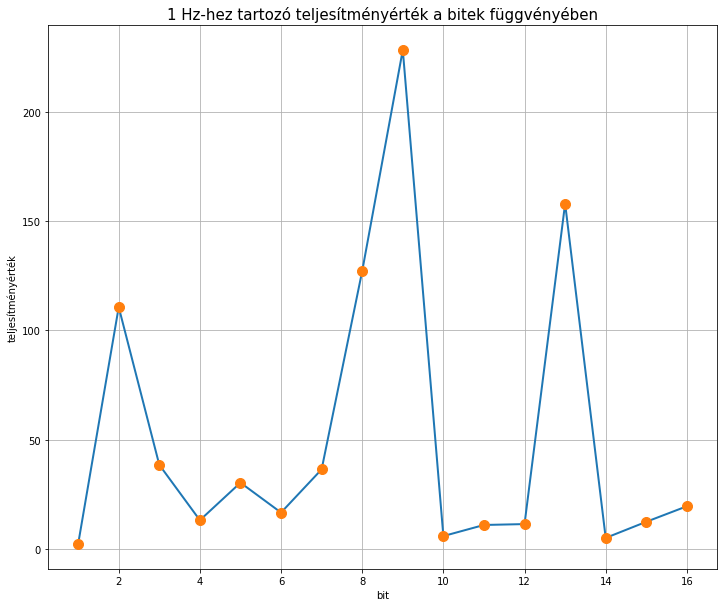

In [18]:
figsize(12,10)
plot(bits,ertek,lw = 2)
plot(bits,ertek, ls = " ", marker = "o", markersize = 10)
title("1 Hz-hez tartozó teljesítményérték a bitek függvényében", size = 15)
xlabel("bit")
ylabel("teljesítményérték")
grid(True)

Ebben a felállásban abszólút semmilyen rendszerességet nem tapasztaltam.


## 4. feladat
Játék a kvantálási zajjal. Keressen egy szimpatikus előre rögzített hangmintát (pl. zenemű). Vizsgálja meg egy-egy minta hány biten van a digitalizált felvételben ábrázolva. Rendre csökkentse a reprezentálásra felhasználható bitek számát, és vizsgálja meg hogyan romlik a hangminőség. Mennyire tudja tettenérni a degradációt ábrák segítségével? Mikor érez visszajátszás után hallás alapján minőségromlást?

In [19]:
mintavetelezesi_arany, hangadat = wavfile.read("dm.wav")


bit_per_sample = hangadat.dtype.itemsize * 8 #megadja a minta méretét bytebna -> *8 ->bit
print(f"A hangfájl",bit_per_sample,"-biten van ábrázolva.")

#a felvillódzó hiba az audacityben ráagatott metaadatok miatt, van tökéletesen lefut így is.

A hangfájl 32 -biten van ábrázolva.


<ipython-input-19-577c3a2f4e5f>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  mintavetelezesi_arany, hangadat = wavfile.read("dm.wav")


In [20]:
def bitmelyseg_csokkentes(jel, lepesek):
    eredeti_bitmelyseg = 32  # Az eredeti bitmélység
    bitmelysegek = []  
    korrelacio_ertekek = []
        
    for lepes in range(4, lepesek + 1, 4): #32 bitről indulva négyesével csökkentgettem a bit értékét
        uj_bitmelyseg = eredeti_bitmelyseg - lepes
        if uj_bitmelyseg <= 0:
            break

        # kvantáljuk a jelet az új bitmélységre a szokásos módon
        Q = (max(jel[:,0]) - min(jel[:,0])) / (2 ** uj_bitmelyseg)
        kvantalt_jel = np.round(jel / Q) * Q 
        
        
        # kiirattam a keletkező új fileokat
        uj_hangfajl_neve = f'hangfile_{uj_bitmelyseg}bit.wav'
        wavfile.write(uj_hangfajl_neve,mintavetelezesi_arany ,kvantalt_jel)
        
        #perarson - lineáris korrelációt számoltam az eredeti jel és a kvantált jel között
        korrelacio, _ = pearsonr(jel[:,0], kvantalt_jel[:,0])

        bitmelysegek.append(uj_bitmelyseg)
        korrelacio_ertekek.append(korrelacio) 
    return bitmelysegek, korrelacio_ertekek


    
lepesek = 28
bitmelysegek, corr_ertekek = bitmelyseg_csokkentes(hangadat, lepesek)
    

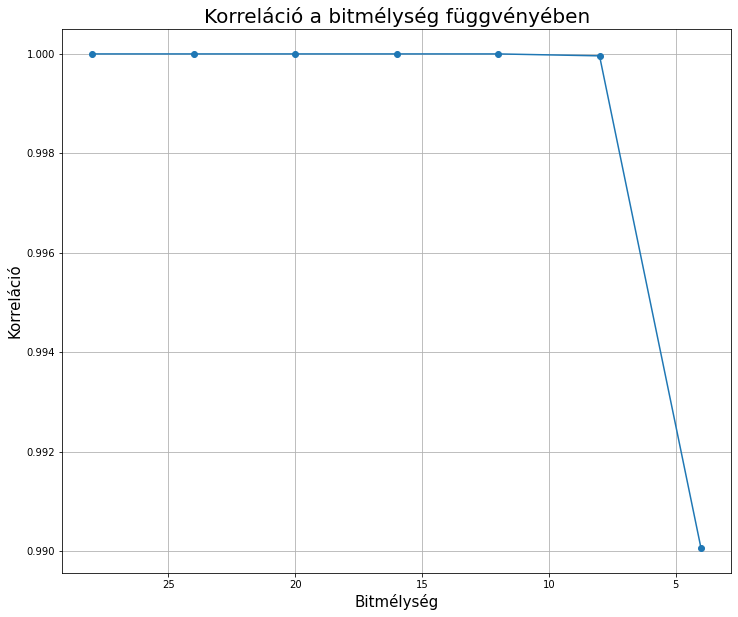

In [21]:
plt.figure()
plt.plot(bitmelysegek, corr_ertekek, marker='o')
plt.xlabel('Bitmélység', size = 15)
plt.ylabel('Korreláció', size = 15)
plt.title('Korreláció a bitmélység függvényében', size = 20)
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

Ezzel az ábrával remekül tudom szemléltetni, amit a fülemmel is hallhattam. Az első zajosabb jelek 15 bit alatt jelentek meg, de egészen 8 bit-ig majdnem tökéletes volt, aztán hirtelen nagyon zajos lett az egész 4 bit környékén.

## 5. feladat
Építsünk flash-konvertert. 
<img src="flash.png" alt="flash">
Mit mondhatunk az áramkör működéséről, ha az alábbi hibák lépnek fel:
* az $R_\mathrm{16}$ egyik lábát nem kötjük be,
* az $R_\mathrm{1}$ egyik lábát nem kötjük be,
* az $R_\mathrm{14}$ két lábát óvatlanul összeforrasztjuk,
* az $U_\mathrm{13}$ komparátor alacsony szinten _ragad_?


### 1. válasz: 
Referencia feszültség hiányában végig megy az összes komparátoron és 15 értéket ad vissza, mert $V_{in}$ mindig magasabb mint a földelés.


### 2. válasz:
Ha $V_{in}$ kisebb mint $V_{ref}$ a kimenet nullát fog adni, míg ha nagyobb akkor  ismét 15-öt


### 3. válasz:
a 13-as érték meg fog szűnni, mert a két lábon azonos feszültség lesz, nem történik leosztás, a maradék ellenálásokon fog szétoszlani ez a kimaradás. 


### 4. válasz:
A rendszer 13-at fog  visszaadni, mert $u_{13}$- at követően a komparátor azt fogja hinni, hogy a feszültség kisebb mint a referencia feszültség, és nulla értékeket fog visszaküldeni.

## 6. feladat
Hogyan működik az alábbi áramkör?
<img src='tracking.png' alt="tracking">
Próbajelek segítségével mutassa meg az átalakító működését, és diszkuttálja a tapasztalatait!

Az ábrán egy tracking type adc-t láthatunk. Az átalakítás kezdetén a számláló értéke 0, és addig nő míg az átalakított feszültség eléri a bemeneti feszültség értékét. Ezt követően addig fog csökkenni, míg újra el nem éri a bemeneti feszültséget. Ezzel a bizonyos fel le ugrálással követi a beérkező jel alakját. 

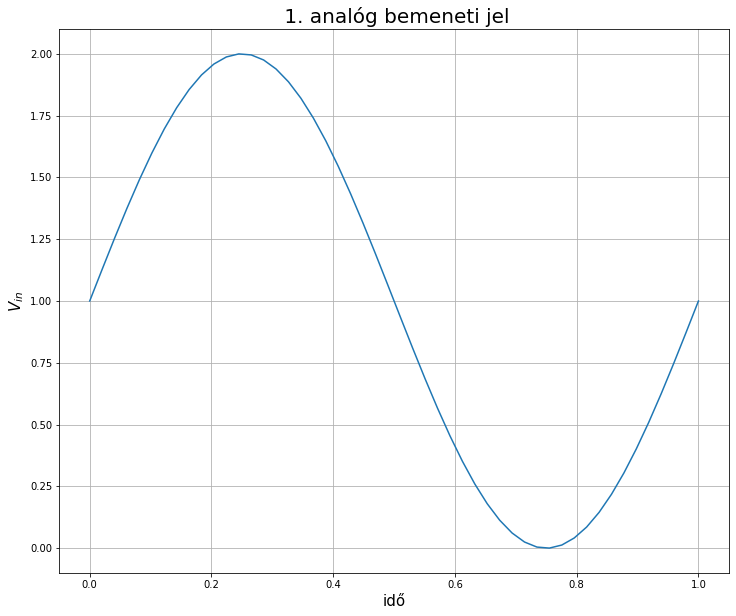

In [22]:
amplitúdó = 1  
frekvencia = 1  
ido = linspace(0,1,50)
VIN = amplitúdó * np.sin(2 * pi * frekvencia*ido) + 1 #szebb ábárzolás érdekében feljebb toltam
tplot = linspace(0,1,50)
plot(tplot,VIN)
xlabel("idő", size = 15)
ylabel(r"$V_{in}$", size = 15)
title(" 1. analóg bemeneti jel", size = 20)
grid(True)

In [23]:
#példa működés létrehozása
VDAC = 0  # Kezdeti érték 0

output = []  # Itt tároljuk az eredményeket

for value in VIN:
    if VDAC < value: #megnézzük, hogy kisebb vagy nagyobb-e és növeljük/csökkentjük
        VDAC += 0.5
    elif VDAC > value:
        VDAC -= 0.5
    output.append(VDAC)

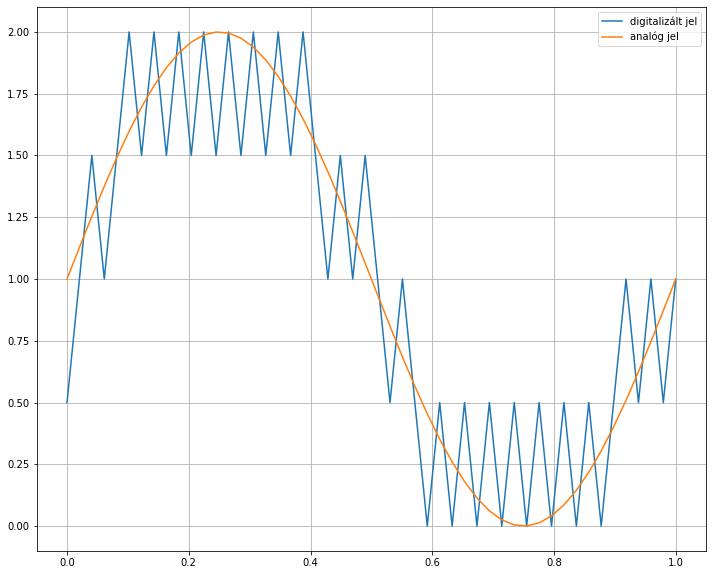

In [24]:
plot(tplot,output,label = "digitalizált jel")
plot(tplot,VIN, label = "analóg jel")
legend()
grid(True)

#### 2. próbajel:

In [25]:
def triangle_wave(hz, length):
    t = linspace(0, length, 150, endpoint=True)
    y = signal.sawtooth(2 * np.pi * hz * t, width=0.5)
    return t, y

t, VIN = triangle_wave(5, 1)

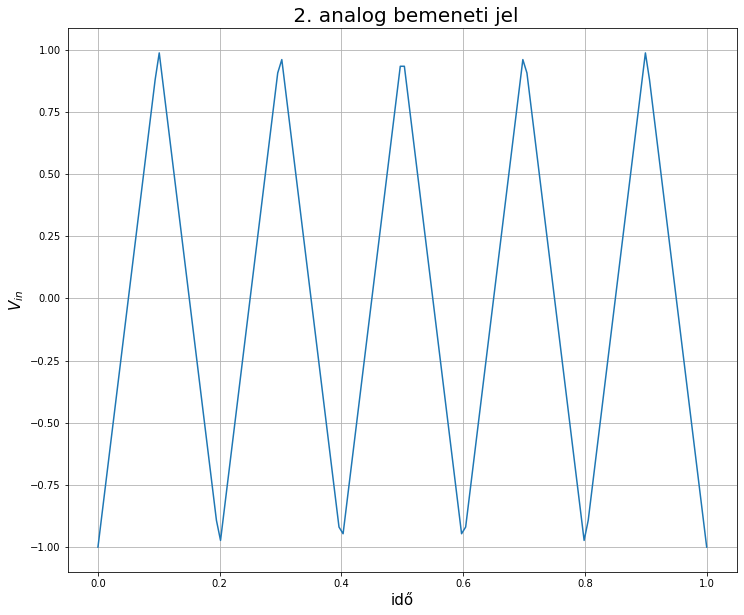

In [26]:
plot(t,VIN)
xlabel("idő", size = 15)
ylabel(r"$V_{in}$", size = 15)
title(" 2. analog bemeneti jel", size = 20)
grid(True)

In [27]:
VDAC = 0  # Kezdeti érték 0

output = []  # Itt tároljuk az eredményeket

for value in VIN:
    if VDAC < value: #megnézzük, hogy kisebb vagy nagyobb-e és növeljük/csökkentjük
        VDAC += 0.5
    elif VDAC > value:
        VDAC -= 0.5
    output.append(VDAC)

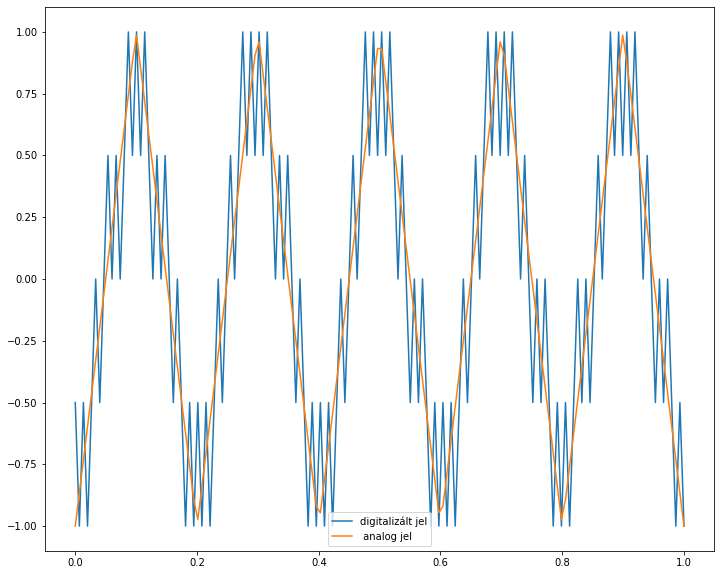

In [28]:
plot(t,output, label = "digitalizált jel")
plot(t,VIN, label = " analog jel")
legend()

### Tapasztalat: 

Ugyan nagyon-nagy körvonalakban, de remekül digitalizálja az analog jeleket, az áramkör egyszerűségéhez képest mérten. Tökéletes az olyan feladatok ellátására, ahol csak a jelalak a lényeg.

## 7. feladat

A $\Delta-\Sigma$ ($\Sigma-\Delta$) analóg-digitális átalakító működési elve a túlmintavételezés, ahol egy kisfelbontású ADC egy visszacsatolási körben végzi az átalakításokat. Legtöbb esetben egy-bites átalakító, egy szimpla komparátort használunk e célra. Itt ennek a kimenő jelét vonjuk ki a mérendő analóg jelből, ezzel 0V körül mozog az integrátor bemenete. Az összeállítás segítségével az impulzus sűrűségében lesz a jelszint kódolva (PDM - _pulse-density-modulation_). Ezt a bitfolyamot szűrjük és alakítjuk kódszavakká.

<img src='sigma_delta.png' alt="szigma-delta">

Milyen bitfolyamot várunk az alábbi bemenetekre:
* $V_\mathrm{in}$ = 0V,
* $V_\mathrm{in}$ = $V_\mathrm{DD}$,
* $V_\mathrm{in}$ = $V_\mathrm{ref}$?

Tegyük fel az alábbi kimeneteket, majd alakítsuk 3 illetve 4 bites kódszavakká
* `001001001001001`
* `101101101101101`
* `010010001100010`
* `010001100010001`
* `111011101110111`

Írd le a tapasztalataid.